I found a books-sales and rating dataset on kaggle. Upon reviewing all the information, I have decided that I want to make the units sold my target (y value).

[Kaggle Link](https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings)



In [ ]:
import numpy as np

from sklearn import model_selection
#Importing train_test_split from sklearn - Used for spliting data into train and test
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
!pip install -q kaggle
#Upload your API key
files.upload()
#Make a folder for your key
!mkdir ~/.kaggle
#Copy the key into that folder
!cp kaggle.json ~/.kaggle/
#And finally allow access to that file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d thedevastator/books-sales-and-ratings

books-sales-and-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Make a directory to hold the set we just downloaded
!mkdir data
#When downloading from kaggle, sets are almost always zipped for efficient transfer, hence the need to unzip the dataset into the data folder
!unzip books-sales-and-ratings -d data

mkdir: cannot create directory ‘data’: File exists
Archive:  books-sales-and-ratings.zip
replace data/Books_Data_Clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls -lh data

total 160K
-rw-r--r-- 1 root root 159K Dec  6 04:54 Books_Data_Clean.csv


In [ ]:
data = pd.read_csv('data/Books_Data_Clean.csv')
data.head(5)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [ ]:
data = data.drop(['index', 'Book Name'], axis = 1)

In [ ]:
data = data.dropna(subset=['Publishing Year', 'Author', 'Author_Rating',
       'Book_average_rating', 'Book_ratings_count', 'genre', 'gross sales',
       'publisher revenue', 'sale price', 'sales rank', 'units sold'])

In [ ]:
data.describe()

,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,1971.377923,4.006595,94913.969130,1857.861862,843.771160,4.871319,611.763330,9681.536950
std,185.080257,0.247004,31527.713028,3938.558251,2258.596467,3.561121,370.005111,15377.042555
min,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,1985.000000,3.850000,70382.000000,371.250000,0.000000,1.990000,287.000000,550.000000
50%,2003.000000,4.010000,89262.000000,810.840000,272.916000,3.990000,596.000000,3915.000000
75%,2010.000000,4.170000,113915.000000,1488.270000,721.554000,6.990000,933.000000,5319.000000
max,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
# Checked The Different Values In Language Code And Their Frequencies
print(data['language_code'].value_counts())
# I Won't Be Using Language Code As One Of My Features Due To
# Most Of The Books Being English. The Model Will Be Biased Toward
# The Books In English And The Accuracy May Be Negatively Impacted
data = data.drop(['language_code'], axis = 1)

eng      737
en-US    234
en-GB     30
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: language_code, dtype: int64


In [ ]:
# Author Seems To Be A More Unbiased Feature - Will Likely Use
print(data['Author'].value_counts())

Stephen King                                              29
John Grisham                                              13
Jodi Picoult                                              11
Nicholas Sparks                                           10
Jim Butcher                                               10
                                                          ..
Nora Roberts                                               1
John Scalzi                                                1
Irma S. Rombauer, Marion Rombauer Becker, Ethan Becker     1
Joe Haldeman                                               1
Dashiell Hammett                                           1
Name: Author, Length: 734, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease

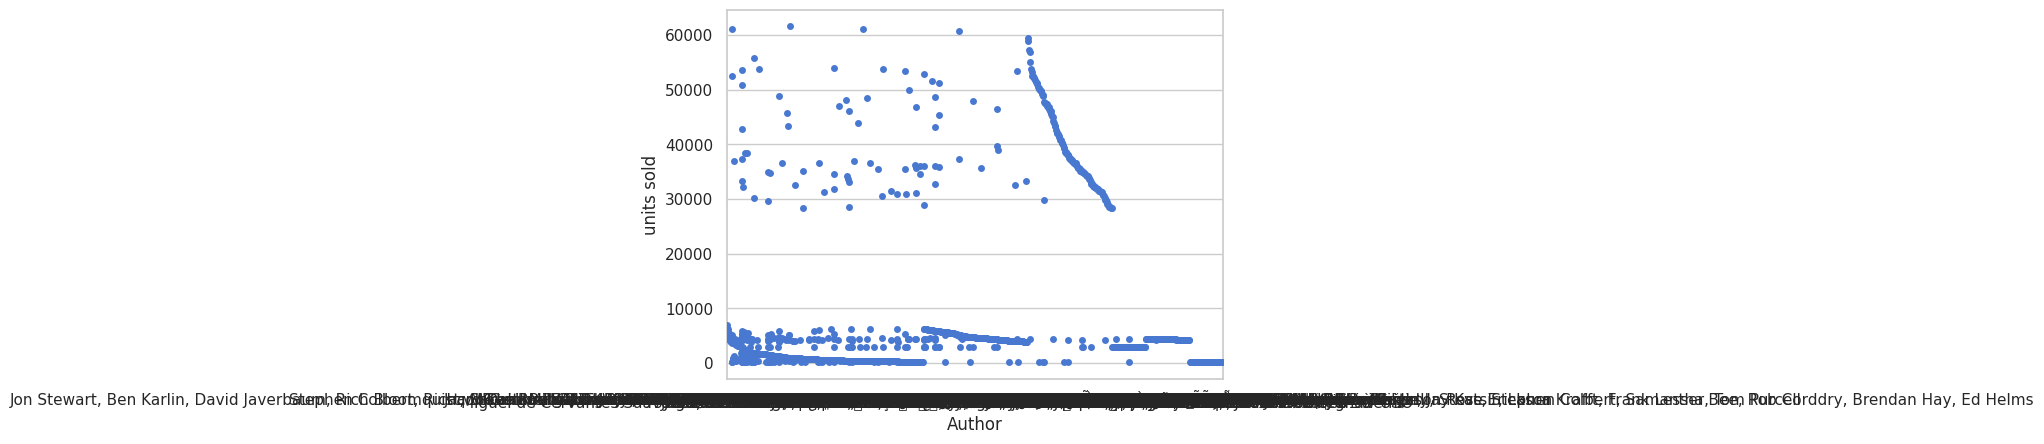

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data, x="Author", y="units sold")
# The Publisher Doesn't Seem To Have Much Of An Impact On The Units Sold
# Let's Remove The Publisher Feature


In [ ]:
# Publisher Looks Like Another Biased Feature
# But Let's Take A Look At It's Relation On A Graph
print(data['Publisher '].value_counts())

Amazon Digital Services,  Inc.          600
Random House LLC                        120
Penguin Group (USA) LLC                 108
HarperCollins Publishers                 71
Hachette Book Group                      65
Simon and Schuster Digital Sales Inc     56
Macmillan                                41
HarperCollins Publishing                  4
HarperCollins Christian Publishing        4
Name: Publisher , dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.5% of the points cannot be plac

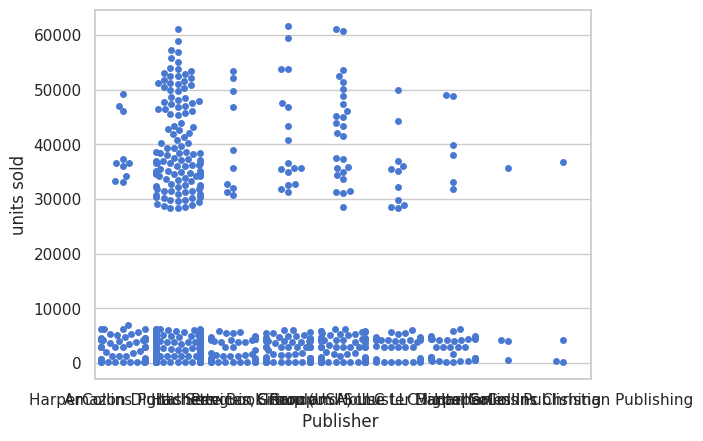

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data, x="Publisher ", y="units sold")
# The Publisher Doesn't Seem To Have Much Of An Impact On The Units Sold
# Let's Remove The Publisher Feature
data = data.drop(['Publisher '], axis = 1)

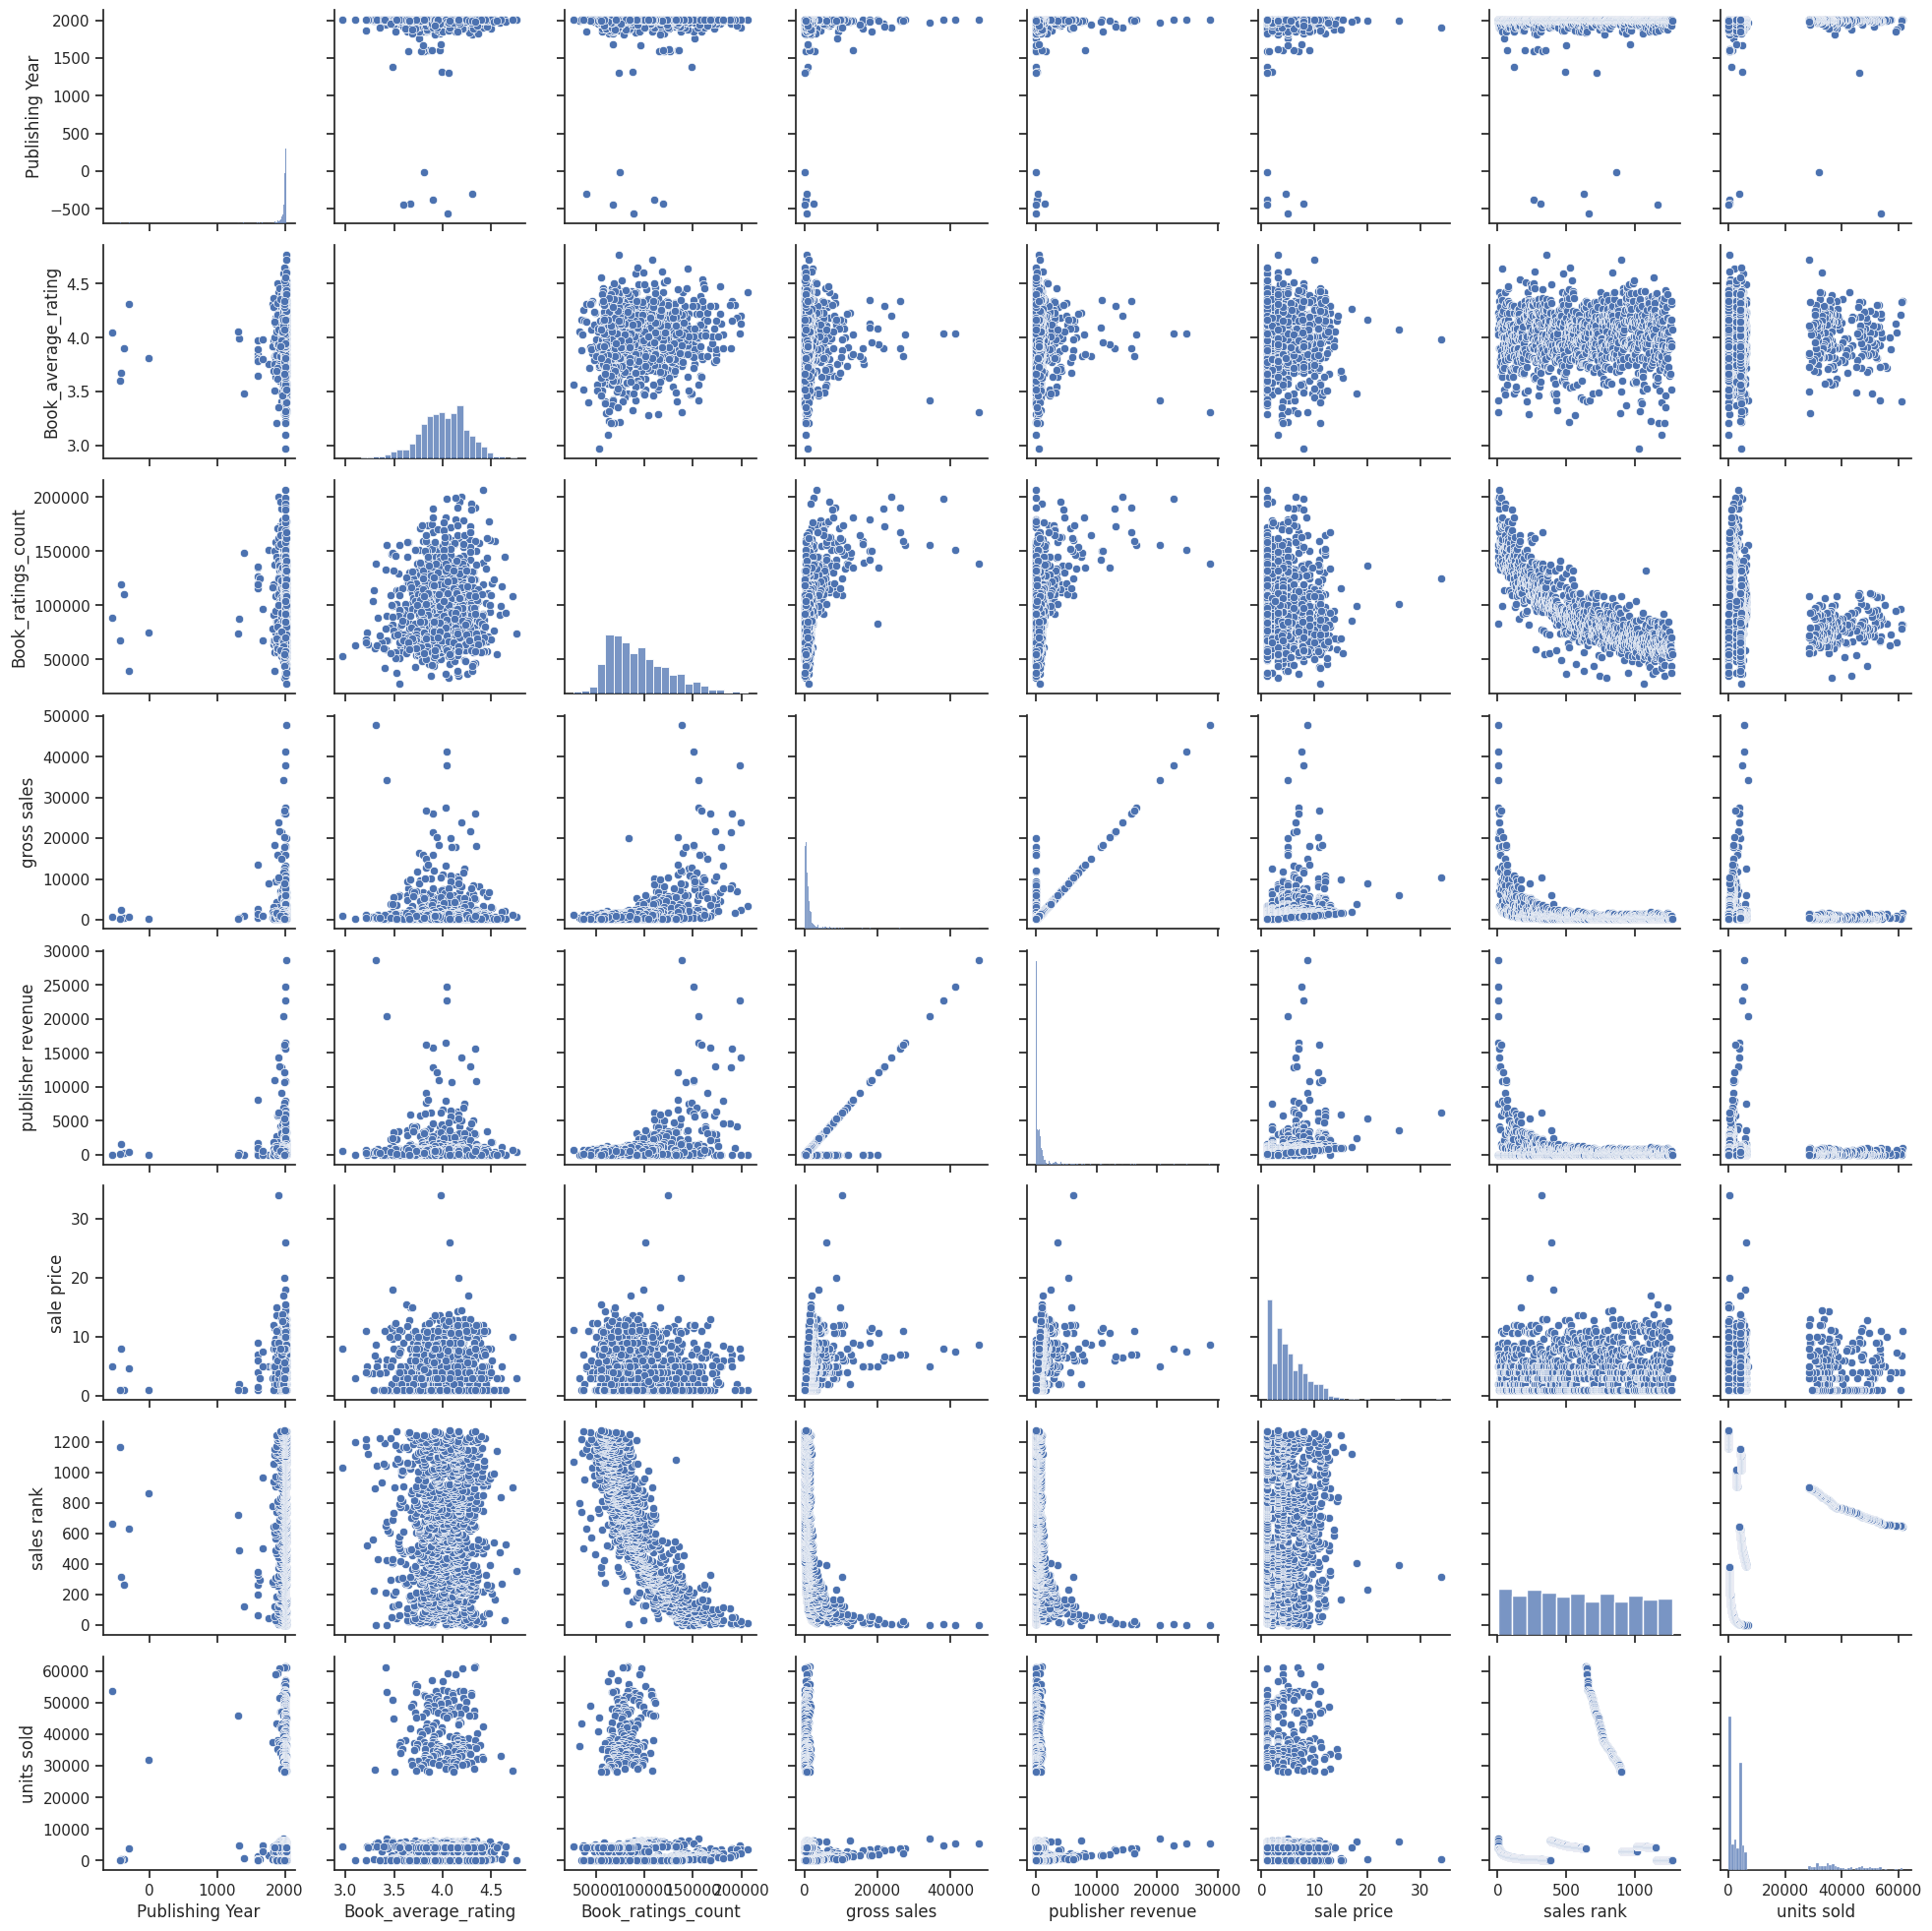

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(data)

In [ ]:
data.columns

Index(['Publishing Year', 'Author', 'Author_Rating', 'Book_average_rating',
       'Book_ratings_count', 'genre', 'gross sales', 'publisher revenue',
       'sale price', 'sales rank', 'units sold'],
      dtype='object')

In [ ]:
# Storing The Discontinuous Data To Another Data Variable
OHE_data = data[['Publishing Year','Author', 'sales rank', 'genre', 'Author_Rating']]
# Removing Discontinous Data From Main Data Variable
data = data.drop(['Publishing Year', 'Author', 'sales rank', 'genre', 'Author_Rating'], axis = 1)
# Displaying Discontinous Data
OHE_data.head()

,Publishing Year,Author,sales rank,genre,Author_Rating
0,1975.0,"Unknown, Seamus Heaney",1,genre fiction,Novice
1,1987.0,"Frank Miller, David Mazzucchelli, Richmond Lew...",2,genre fiction,Intermediate
2,2015.0,Harper Lee,3,genre fiction,Novice
3,2008.0,David Sedaris,3,fiction,Intermediate
4,2011.0,Laini Taylor,4,genre fiction,Intermediate


In [ ]:
# One Hot Encoding The Data
OHE_data = pd.get_dummies(OHE_data)
OHE_data.head()

,Publishing Year,sales rank,"Author_A.A. Milne, Ernest H. Shepard",Author_A.S.A. Harrison,Author_Abbi Glines,Author_Adam Johnson,"Author_Adam Mansbach, Ricardo CortÃ©s","Author_Aesop, Laura Harris, Laura Gibbs",Author_Agatha Christie,"Author_Agatha Christie, Î¡Î¿Î¶Î¯Ï„Î± Î£ÏŽÎºÎ¿Ï…",...,"Author_Ø£Ø­Ù„Ø§Ù… Ù…Ø³ØªØºØ§Ù†Ù…ÙŠ, Ahlam Mosteghanemi",Author_Ø£Ø­Ù…Ø¯ Ù…Ø±Ø§Ø¯,genre_children,genre_fiction,genre_genre fiction,genre_nonfiction,Author_Rating_Excellent,Author_Rating_Famous,Author_Rating_Intermediate,Author_Rating_Novice
0,1975.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1987.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2015.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2008.0,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2011.0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Concatenating The One Hot Encoded Features With Other Data
data = pd.concat([data, OHE_data], axis=1)
data.columns

Index(['Book_average_rating', 'Book_ratings_count', 'gross sales',
       'publisher revenue', 'sale price', 'units sold', 'Publishing Year',
       'sales rank', 'Author_A.A. Milne, Ernest H. Shepard',
       'Author_A.S.A. Harrison',
       ...
       'Author_Ø£Ø­Ù„Ø§Ù… Ù…Ø³ØªØºØ§Ù†Ù…ÙŠ, Ahlam Mosteghanemi',
       'Author_Ø£Ø­Ù…Ø¯ Ù…Ø±Ø§Ø¯', 'genre_children', 'genre_fiction',
       'genre_genre fiction', 'genre_nonfiction', 'Author_Rating_Excellent',
       'Author_Rating_Famous', 'Author_Rating_Intermediate',
       'Author_Rating_Novice'],
      dtype='object', length=750)

In [ ]:
# Data Split
X = data.drop(['units sold'], axis = 1)
y = data['units sold']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Find the shape of the training dataset
print("Shape Of X Values For Train", X_train.shape)
print("Shape Of y Values For Train", y_train.shape)
print("Shape Of X Values For Test", X_test.shape)
print("Shape Of Y Values For Test", y_test.shape)

Shape Of X Values For Train (748, 749)
Shape Of y Values For Train (748,)
Shape Of X Values For Test (321, 749)
Shape Of Y Values For Test (321,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

k_neighbors_regressor = KNeighborsRegressor()
k_neighbors_regressor.fit(X_train, y_train)

decision_tree_regressor = DecisionTreeRegressor(max_depth=5)
decision_tree_regressor.fit(X_train, y_train)

kn_pred = k_neighbors_regressor.predict(X_test)
dt_pred = decision_tree_regressor.predict(X_test)


In [ ]:
r2Lin = metrics.r2_score(y_test, linear_pred)
r2Dt = metrics.r2_score(y_test, dt_pred)
r2Kn = metrics.r2_score(y_test, kn_pred)

print(f'r2 Score: {r2Lin}')
print(f'r2dt Score: {r2Dt}')
print(f'r2kn Score: {r2Kn}')

# Best Score Is From The Decision Tree
# Let's Use It And Tune It To Be Even Better

r2 Score: -5.5868226482437164e+26
r2dt Score: 0.9577096281626085
r2kn Score: 0.009281292275892805


In [ ]:
print(f'r2 Score: {r2Dt}')
print('mse score: %.2f' % mean_squared_error(y_test, dt_pred))
print('mae score: %.2f' % mean_absolute_error(y_test, dt_pred))

r2 Score: 0.9577096281626085
mse score: 10421077.90
mae score: 488.82


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

parameters = {'criterion':['squared_error','absolute_error'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# create an instance of the grid search object
optimized_Decision_Tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
optimized_Decision_Tree.fit(X_train,y_train)

# show best parameter configuration found for regressor
rgDT_params = optimized_Decision_Tree.best_params_
rgDT_params

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_leaf_nodes': 25,
 'min_samples_split': 4}

In [ ]:
model = optimized_Decision_Tree.best_estimator_
y_pred = model.predict(X_test)
print(metrics.r2_score(y_test, y_pred))
print('mse score: %.2f' % mean_squared_error(y_test, y_pred))
print('mae score: %.2f' % mean_absolute_error(y_test, y_pred))

0.9586635632211679
mse score: 10186011.83
mae score: 441.42


Overall, all the scores did improve!
